# Load du lieu len

In [13]:
import sys
sys.path.append('../Common')

import CommonYFinance

symbol = 'VCB.VN'
from_date = '2023-01-01'
to_date = '2024-03-23'
interval = '1d'

data = CommonYFinance.CommonYFinance.loaddataYFinance(symbol, from_date, to_date, interval)

data

[*********************100%%**********************]  1 of 1 completed


Datetime          Open          High           Low         Close  \
0   2023-01-03  67908.554688  69940.726562  67908.554688  69940.726562   
1   2023-01-04  70194.750000  70194.750000  69263.335938  70110.078125   
2   2023-01-05  70110.078125  71126.164062  69856.054688  71126.164062   
3   2023-01-06  71126.164062  71803.554688  71041.492188  71126.164062   
4   2023-01-09  72650.296875  73581.710938  71803.554688  73581.710938   
..         ...           ...           ...           ...           ...   
291 2024-03-18  94300.000000  94500.000000  92500.000000  93000.000000   
292 2024-03-19  92500.000000  93500.000000  92500.000000  92500.000000   
293 2024-03-20  92500.000000  94100.000000  92500.000000  93200.000000   
294 2024-03-21  94000.000000  95500.000000  94000.000000  95200.000000   
295 2024-03-22  95200.000000  96800.000000  95200.000000  96400.000000   

      Volume  
0    1287053  
1    1150175  
2    1273826  
3    1489831  
4    1968845  
..       ...  
291  1867500  
292  1060100  
293   970900  
294  1694100  
295  1889000  

[296 rows x 6 columns]

model = ARIMA(data['Close'], order=(5, 1, 0)): Lệnh này khởi tạo một mô hình ARIMA với dữ liệu đầu vào là cột 'Close' từ DataFrame data. Tham số order=(p, d, q) xác định cấu hình của mô hình, nơi:

p: số lượng lệnh tự hồi quy (AR terms). p = 5 nghĩa là mô hình sẽ xem xét 5 giá trị trước đó trong chuỗi để dự đoán giá trị hiện tại.
d: bậc của phép tích phân (I for Integrated), giúp làm cho chuỗi trở nên dừng. d = 1 chỉ ra rằng dữ liệu nên được chuyển đổi một lần (sử dụng sai phân) để đạt được tính dừng.
q: số lượng lệnh trung bình động (MA terms). q = 0 nghĩa là không có lệnh MA nào được sử dụng trong mô hình.

# Chay mo hinh du doan gia tuong lai

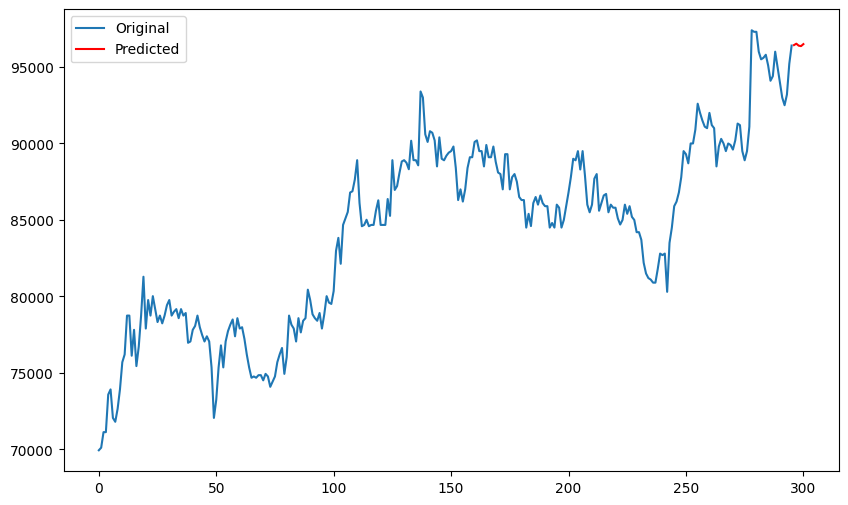

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Giả sử bạn đã có DataFrame `data` với cột 'Close' là giá đóng cửa
# Datetine, Open, High, Low, Close, Volume

# Buoc 1: Xay dung mo hinh
# model = ARIMA(data['Close'], order=(5, 1, 0))  # Ví dụ mô hình ARIMA với tham số (p,d,q)
model = ARIMA(data['Close'], order=(2, 1, 3))  # Ví dụ mô hình ARIMA với tham số (p,d,q)

model_fit = model.fit()
# print(model_fit.summary())

# Buoc 2: Kiem tra do chinh xac cua mo hinh
'''Giá trị AIC và BIC càng thấp thì mô hình càng tốt vì nó chỉ ra rằng mô hình có khả năng giải thích dữ liệu cao mà không làm 
cho mô hình trở nên quá phức tạp.'''

# Buoc 3: Dự Đoán và Xác Định Xu Hướng
# Dự đoán giá cả trong tương lai
predictions = model_fit.forecast(steps=5)

# Sử dụng kết quả dự đoán để xác định xu hướng tăng/giảm

# Buoc 4: Trực Quan Hóa Kết Quả
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Original')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()


In [16]:
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA

# Đặt chỉ mục DataFrame với cột 'Datetime' có dữ liệu kiểu datetime
data.set_index('Datetime', inplace=True)

# Buoc 1: Xay dung mo hinh
# model = ARIMA(data['Close'], order=(5, 1, 0))  # Ví dụ mô hình ARIMA với tham số (p,d,q)
model = ARIMA(data['Close'], order=(2, 1, 3))  # Ví dụ mô hình ARIMA với tham số (p,d,q)

model_fit = model.fit()
# print(model_fit.summary())

# Buoc 2: Kiem tra do chinh xac cua mo hinh
'''Giá trị AIC và BIC càng thấp thì mô hình càng tốt vì nó chỉ ra rằng mô hình có khả năng giải thích dữ liệu cao mà không làm 
cho mô hình trở nên quá phức tạp.'''

# Buoc 3: Dự Đoán và Xác Định Xu Hướng
# Dự đoán giá cả trong tương lai
predictions = model_fit.forecast(steps=5)

# Sử dụng kết quả dự đoán để xác định xu hướng tăng/giảm

# Buoc 4: Trực Quan Hóa Kết Quả
import plotly.graph_objects as go
# Tạo dãy ngày cho các dự đoán. Giả sử data.index[-1] là ngày cuối cùng trong dữ liệu của bạn
pred_dates = pd.date_range(start=data.index[-1], periods=6, freq='D')  # Thay đổi 'D' thành đơn vị thời gian mong muốn

# Trực Quan Hóa Kết Quả
# Tạo biểu đồ mới với thư viện Plotly
fig = go.Figure()

# Thêm dữ liệu giá đóng cửa gốc vào biểu đồ
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Giá Đóng Cửa Gốc'))

# Thêm dữ liệu dự đoán vào biểu đồ
fig.add_trace(go.Scatter(x=pred_dates, y=predictions, mode='lines+markers', name='Dự Đoán'))

# Định cấu hình layout của biểu đồ
fig.update_layout(
    title='Dự Đoán Giá Cả Sử Dụng Mô Hình ARIMA',
    xaxis_title='Thời Gian',
    yaxis_title='Giá Đóng Cửa',
    hovermode='x unified'
)

# Hiển thị biểu đồ
fig.show()

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginn

# Ve gia du doan va gia dong cua qua khu

In [5]:
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA

# Buoc 1: Xay dung mo hinh
# model = ARIMA(data['Close'], order=(5, 1, 0))  # Ví dụ mô hình ARIMA với tham số (p,d,q)
model = ARIMA(data['Close'], order=(2, 1, 2))  # Ví dụ mô hình ARIMA với tham số (p,d,q)

model_fit = model.fit()
# print(model_fit.summary())

# Buoc 2: Kiem tra do chinh xac cua mo hinh
'''Giá trị AIC và BIC càng thấp thì mô hình càng tốt vì nó chỉ ra rằng mô hình có khả năng giải thích dữ liệu cao mà không làm 
cho mô hình trở nên quá phức tạp.'''

# Buoc 3: Dự Đoán và Xác Định Xu Hướng
# Dự đoán giá cả trong tương lai
predictions = model_fit.predict(start=0, end=len(data)-1, typ='levels')

# Sử dụng kết quả dự đoán để xác định xu hướng tăng/giảm

# Buoc 4: Trực Quan Hóa Kết Quả
import plotly.graph_objects as go
# Tạo biểu đồ mới với thư viện Plotly
fig = go.Figure()

# Thêm dữ liệu giá đóng cửa gốc vào biểu đồ
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Giá Đóng Cửa Gốc'))

# Thêm dữ liệu dự đoán vào biểu đồ
fig.add_trace(go.Scatter(x=data.index, y=predictions, mode='lines+markers', name='Dự Đoán'))

# Định cấu hình layout của biểu đồ
fig.update_layout(
    title='Dự Đoán Giá Cả Sử Dụng Mô Hình ARIMA',
    xaxis_title='Thời Gian',
    yaxis_title='Giá Đóng Cửa',
    hovermode='x unified'
)

# Hiển thị biểu đồ
fig.show()

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



# Toi uu hoa mo hinh ARIMA voi p, d, q

In [14]:
# import itertools
# import statsmodels.api as sm
# import pandas as pd

# # Đặt chỉ mục DataFrame với cột 'Datetime' có dữ liệu kiểu datetime
# # data.set_index('Datetime', inplace=True) da dat o tren

# # Xác định khoảng giá trị cho tham số p, d, q
# p = d = q = range(0, 6)
# pdq = list(itertools.product(p, d, q))

# best_aic = float("inf")
# best_pdq = None
# best_model = None

# for param in pdq:
#     try:
#         model = sm.tsa.ARIMA(data['Close'], order=param)
#         results = model.fit()
#         if results.aic < best_aic:
#             best_aic = results.aic
#             best_pdq = param
#             best_model = results
#     except:
#         continue

# print(f'Best ARIMA{best_pdq} AIC:{best_aic}')


c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. 

Best ARIMA(2, 1, 3) AIC:5018.466438782514


c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [17]:
data['Predicted_Close'] = predictions # Chay mo hinh o tren

# Tính Momentum
data['Momentum'] = data['Close'].diff()

# Tính RSI
delta = data['Close'].diff()
up, down = delta.clip(lower=0), delta.clip(upper=0).abs()
roll_up, roll_down = up.rolling(14).mean(), down.rolling(14).mean()
RS = roll_up / roll_down
data['RSI'] = 100.0 - (100.0 / (1.0 + RS))

# Xác định tín hiệu mua và bán
data['Buy_Signal'] = ((data['Predicted_Close'] > data['Close']) & (data['Momentum'] > 0) & (data['RSI'] < 70))
data['Sell_Signal'] = ((data['Predicted_Close'] < data['Close']) & (data['Momentum'] < 0) & (data['RSI'] > 30))

data

Open          High           Low         Close   Volume  \
Datetime                                                                      
2023-01-03  67908.554688  69940.726562  67908.554688  69940.726562  1287053   
2023-01-04  70194.750000  70194.750000  69263.335938  70110.078125  1150175   
2023-01-05  70110.078125  71126.164062  69856.054688  71126.164062  1273826   
2023-01-06  71126.164062  71803.554688  71041.492188  71126.164062  1489831   
2023-01-09  72650.296875  73581.710938  71803.554688  73581.710938  1968845   
...                  ...           ...           ...           ...      ...   
2024-03-18  94300.000000  94500.000000  92500.000000  93000.000000  1867500   
2024-03-19  92500.000000  93500.000000  92500.000000  92500.000000  1060100   
2024-03-20  92500.000000  94100.000000  92500.000000  93200.000000   970900   
2024-03-21  94000.000000  95500.000000  94000.000000  95200.000000  1694100   
2024-03-22  95200.000000  96800.000000  95200.000000  96400.000000  1889000   

            Predicted_Close     Momentum        RSI  Buy_Signal  Sell_Signal  
Datetime                                                                      
2023-01-03              NaN          NaN        NaN       False        False  
2023-01-04              NaN   169.351562        NaN       False        False  
2023-01-05              NaN  1016.085938        NaN       False        False  
2023-01-06              NaN     0.000000        NaN       False        False  
2023-01-09              NaN  2455.546875        NaN       False        False  
...                     ...          ...        ...         ...          ...  
2024-03-18              NaN -1000.000000  56.291391       False        False  
2024-03-19              NaN  -500.000000  23.655914       False        False  
2024-03-20              NaN   700.000000  29.292929       False        False  
2024-03-21              NaN  2000.000000  41.176471       False        False  
2024-03-22              NaN  1200.000000  51.694915       False        False  

[296 rows x 10 columns]